# 决策树

## I.基本思想
决策树也是做分类的算法，不同的是，它是进行非线性分类的算法。以西瓜的分类为例，说明其非线性，决定一个西瓜是否是好瓜的因素比如有“脉络是否清晰？”“西瓜的密度是多少？”“西瓜的声音脆不脆？”，这三个可能的决策因素。
回答这些问题，相当于以某坐标轴的某个点为基准，把数据点分为两类，全部回答完之后，数据点会被分为很多块。其中某些数据块是一类，其他数据块是另一类。也就是说，我们用一个“超折面”对所有的数据做了分类。
决策树的构建有四个重要的问题：
1. 如何生成候选问题？
2. 如何找到“最佳问题”？（核心）
3. 如何让决策树生长？（编排问题）
4. 如何进行剪枝？（防止过拟合，“死记硬背”）

## II.决策树的构建
### A.如何生成候选问题？
所谓的候选问题就是我们做决策之前要问自己的问题，这个问题一般基于数据的特征，其结果会对数据做出划分。因为特征的类型的不同，产生候选问题也会有不同的范式。
#### 离散特征
离散特征就是说特征的取值是离散的，比如特征“西瓜的颜色”，取值可能是“绿色、红色、蓝色”等等，但是回答一定是一个个离散的点。对于这样的特征，一般有两种划分方式：
1. 多路划分
特征有多少个分支，就产生多少各取值，比如西瓜的颜色特征直接产生三个分支“红”、“绿”、“蓝”。这种方法的**优点在于**直观，一次可以处理所有的情况。但是其**缺陷在于**，分支很多，有可能在每个分支下的数据量很少，影响模型的进一步训练。
2. 二元划分
就是通过提问讲特征化为“是”和“否”两个分支，比如“颜色是否是绿色？”或者“颜色灰度值是否在100以上”。这种分类**优点在于**只产生两个分支，数据很难碎片化，且可以重复使用同一个特征。但是**劣势**就在于当特征取值很多的时候，需要更多的判断，提高计算量。
#### 连续特征
特征的取值是连续的数值，比如西瓜的密度。其划分方式一般就是选取若干个区间作为分类标准。

### B.划分问题的选择问题
不同的特征对最终决策的影响是不同的，比如判断明天的天气，“我今天早上是否吃了早饭”这个特征显然是与决策无关的，但是“今天是否乌云密布？”就与天气相关程度很大，对这个问题的回答可以极大的帮助决策。此外，提问的顺序同样会影响特征与决策的关联程度。比如，判断一个东西是不是西瓜，如果直接问“这个东西是不是绿色的？”其结果对决策的帮助其实不大，但是如果先问“这个东西是不是水果？”在这个提问之后，颜色这个特征就会产生重要的影响。
**纯度及其计算方式**
为了量化这种特征对决策的影响，首先提出了纯度的概念，其反应的是，各个子类混杂各类数据的程度是多少。一下是几个典型的纯度计算方式：
1. 信息熵
$I_{E}(t) = -\Sigma_{i}p(i)log_2p(i)$
其中$P(i)$表示节点t中属于第i类的样本比例，对数以2为底使得二分类最大熵为1。
2. 基尼系数
$I_G(t) = 1 - \Sigma_{i=1}p(i)^2$
其解释十分直观，在节点中随机抽取两个样本，其标签不一致的概率。
3. 分类误差
$I_{CE}(t) = 1 - max(p(i))$
**特征划分准则**
有了纯度之后就可以衡量特征对对决策的增益，也就是，分类前后子节点纯度提升了多少。下面有几个经典的计算方式：
1. 信息增益 (ID3算法)
$Gain(D, A) = Entropy(D) - Σ (|Dᵛ| / |D|) * Entropy(Dᵛ)$
这个结果直接就是分类前后父节点与子节点纯度（信息熵）的差，但是这样会导致那些“稀碎”的数据划分增益最好，出现“过拟合”
- $Entropy(D)$：划分前数据集D的信息熵（不确定性）
- $Σ (|Dᵛ| / |D|) * Entropy(Dᵛ)$：划分后各子集的加权平均熵
- $|Dᵛ|$：特征A取值为v的子集样本数
- $|D|$：总样本数

2. 增益率 (C4.5算法)
$Gain\_ratio(D, A) = \frac{Gain(D, A)}{IV(A)}$
这个结果是对信息增益的归一化处理，消除了对多值特征的偏好
- $Gain(D, A)$：特征A的信息增益
- $IV(A)$：特征A的固有值，$IV(A) = -Σ (|Dᵛ| / |D|) * log₂(|Dᵛ| / |D|)$
- $|Dᵛ|$：特征A取值为v的子集样本数
- $|D|$：总样本数

3. 基尼指数 (CART算法)
$Gini\_index(D, A) = Σ (|Dᵛ| / |D|) * Gini(Dᵛ)$
这个结果是划分后各子节点基尼系数的加权平均值
- $Gini(Dᵛ)$：子集Dᵛ的基尼系数，$Gini(D) = 1 - Σ pᵢ²$
- $Σ (|Dᵛ| / |D|) * Gini(Dᵛ)$：划分后各子集的加权平均基尼系数
- $|Dᵛ|$：特征A取值为v的子集样本数
- $|D|$：总样本数

III. 决策树的生成

决策树的生成是一个自顶向下、递归分裂的过程，其核心是遵循一个“分而治之”的策略，在每个节点上选择最佳划分，不断将数据集细化，直到满足停止条件。

A. 核心算法框架

决策树的生成可以概括为以下递归步骤：
1.  创建根节点：将所有训练数据置于根节点。
2.  选择最佳划分：从当前节点的数据中，依据划分准则（如信息增益、增益率或基尼指数），从所有可用特征中选出最佳划分特征及其划分点。
3.  分裂节点：依据最佳划分特征和划分点，将当前节点的数据划分到两个或多个子节点中。
4.  递归调用：对每个新生成的子节点，重复步骤2和步骤3。
5.  终止递归：当满足以下任意停止条件时，将该节点标记为叶节点，并将其类别设定为当前节点样本中占比最多的类别。
    - 节点中所有样本属于同一类别（纯度已达到最高）。

    - 没有剩余特征可用作进一步划分。

    - 划分前的节点样本数已少于预设的最小分裂样本数。

    - 划分带来的纯度提升小于某个阈值。

B. 生成算法示例

不同算法在生成过程中有其特点：
1.  ID3算法：
    - 使用信息增益作为划分准则。

    - 对离散特征进行多路划分，生成多叉树。

    - 无法直接处理连续特征。

2.  C4.5算法：
    - 使用增益率作为划分准则，克服了ID3对多值特征的偏好。

    - 可处理连续特征（通过二分法）和缺失值。

    - 通常进行后剪枝以提高泛化能力。

3.  CART算法：
    - 使用基尼指数作为划分准则。

    - 对每个特征（包括连续特征和离散特征）都进行二元划分，生成严格的二叉树。

    - 既可解决分类问题，也可解决回归问题。

C. 关键特性

    - 贪婪性：在每个节点都选择当前最优的划分，而不回溯。此举计算高效，但无法保证得到全局最优的树结构。

    - 递归性：整个过程是自顶向下的递归，每个子节点都是原问题的一个更小规模的子集。

IV. 剪枝处理

决策树极易发生过拟合，即模型对训练数据学习得“太好”，甚至记住了噪声和异常值，导致其在未知数据上表现不佳。剪枝是解决过拟合的关键手段，通过主动移除树的部分分支来简化模型，从而提升其泛化能力。

A. 预剪枝

1.  核心思想：在决策树生成过程中，提前停止树的生长。
2.  操作方法：在每次分裂节点前，先用验证集评估此次划分能否提升模型的泛化性能（如准确率）。若能提升，则分裂；否则，停止分裂，将当前节点设为叶节点。
3.  优点：
    - 显著降低训练开销，减少生成树的时间。

    - 避免生成过于复杂的树。

4.  缺点：
    ◦   “视野短浅”：可能当前划分无法立即提升性能，但后续的潜在有价值划分会被提前终止，可能导致欠拟合。

B. 后剪枝

1.  核心思想：允许决策树充分生长（甚至过拟合），然后自底向上地检查并剪去非叶节点。
2.  操作方法：从完全生成的树开始，对于每个非叶节点，考察将其子树替换为叶节点后，模型在验证集上的性能变化。若剪枝后性能不变或提升，则进行剪枝。
3.  优点：
    - 保留了大量划分可能，泛化性能通常优于预剪枝。

    - 避免了预剪枝可能带来的欠拟合风险。

4.  缺点：
    - 训练时间开销大，因为需先生成整棵树再逐一考察。

C. 代价复杂度剪枝（CART算法常用）

这是一种更系统、更数学化的后剪枝方法。

1.  核心思想：通过一个损失函数来平衡树的复杂度与对训练数据的拟合程度。
    -  损失函数：$C_{\alpha}(T) = C(T) + \alpha \times T$

        -  C(T)：衡量树T对训练数据的拟合误差（如基尼指数之和）。

        -  $T$：树$T$的叶节点数量，代表模型的复杂度。

        -   $\alpha（≥0）$：权衡参数，控制对复杂度的惩罚力度。

2.  操作方法：
    - 通过调整$\alpha$的值，可以生成从最复杂（$\alpha=0$）到最简单（只剩根节点）的子树序列。

    - 使用交叉验证的方法，从该子树序列中选择在验证集上表现最好的那一棵作为最终模型。


Predictions: [1 1 0 1 1 1 1 1 0 0]


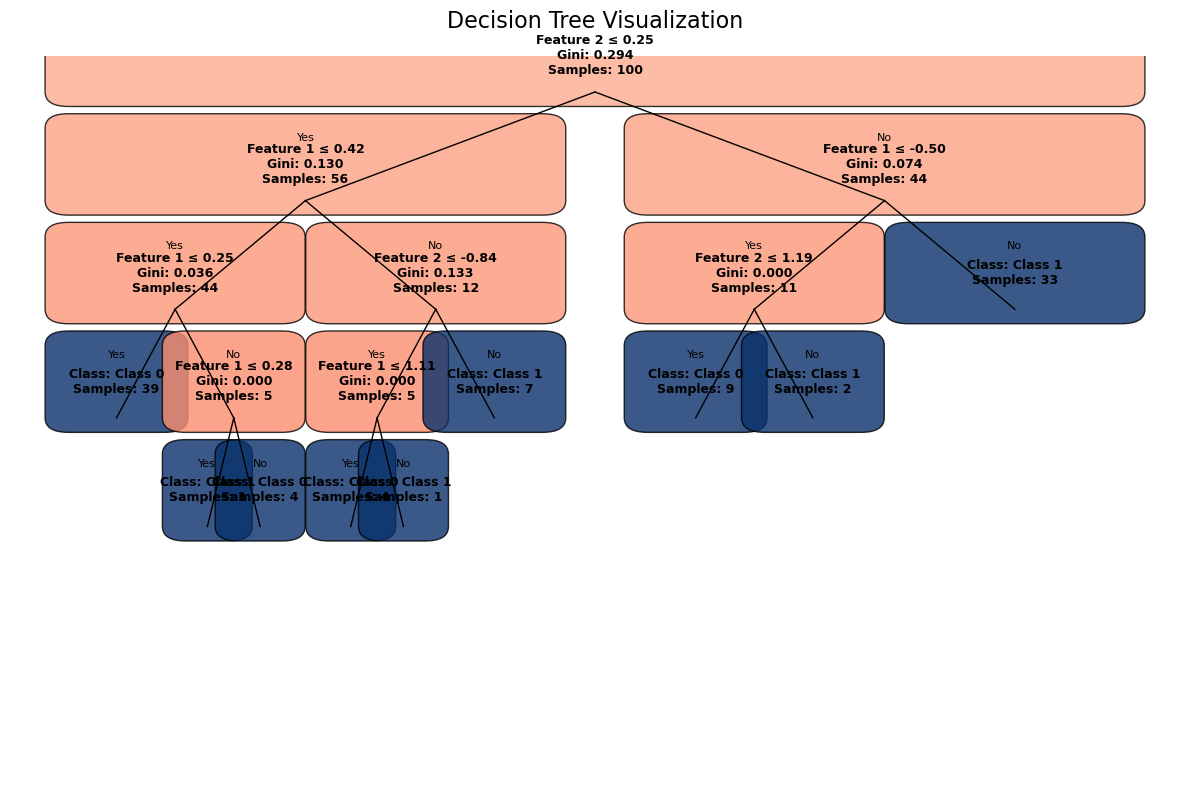

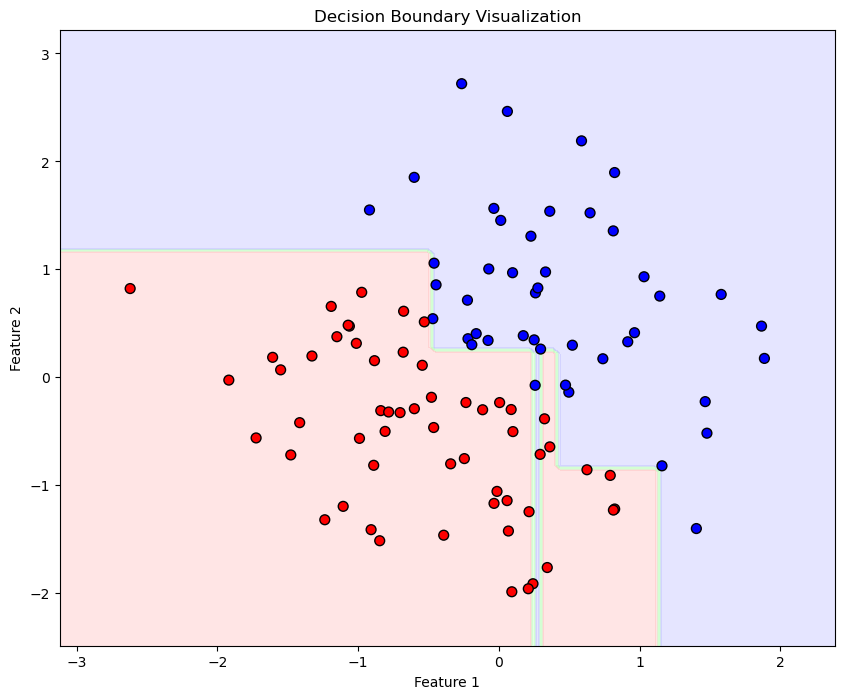

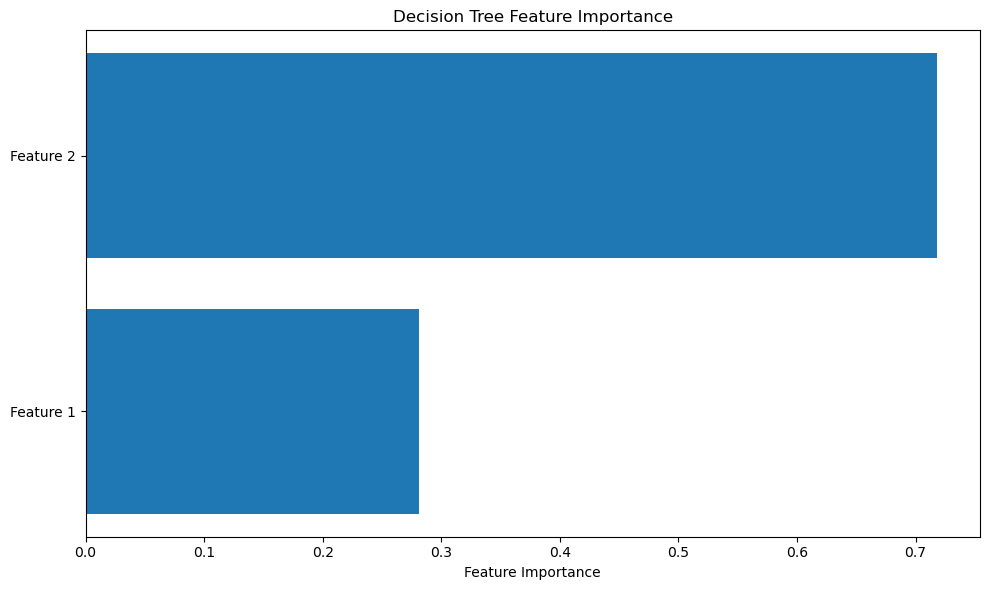

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch

def gini(y):
    """Calculate Gini impurity"""
    if len(y) == 0:
        return 0
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def best_split(X, y):
    """Find the best feature and threshold for splitting"""
    best_gini = float('inf')
    best_feature, best_threshold = None, None
    
    for feature in range(X.shape[1]):
        # Get candidate thresholds (midpoints between feature values)
        feature_values = np.sort(np.unique(X[:, feature]))
        thresholds = (feature_values[:-1] + feature_values[1:]) / 2
        
        for threshold in thresholds:
            # Split data
            left_mask = X[:, feature] <= threshold
            right_mask = X[:, feature] > threshold
            
            if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                continue
                
            # Calculate weighted Gini impurity
            n_left, n_right = len(y[left_mask]), len(y[right_mask])
            n_total = n_left + n_right
            current_gini = (n_left/n_total * gini(y[left_mask]) + 
                           n_right/n_total * gini(y[right_mask]))
            
            if current_gini < best_gini:
                best_gini = current_gini
                best_feature = feature
                best_threshold = threshold
                
    return best_feature, best_threshold, best_gini

def grow_tree(X, y, depth=0, max_depth=5, min_samples=2):
    """Recursively grow decision tree"""
    # Stopping conditions
    if (depth >= max_depth or len(y) < min_samples or len(np.unique(y)) == 1):
        return {
            'type': 'leaf',
            'value': np.argmax(np.bincount(y)),
            'samples': len(y),
            'depth': depth
        }
    
    # Find best split
    feature, threshold, gini_val = best_split(X, y)
    if feature is None:  # Cannot find valid split
        return {
            'type': 'leaf',
            'value': np.argmax(np.bincount(y)),
            'samples': len(y),
            'depth': depth
        }
    
    # Recursively build subtrees
    left_mask = X[:, feature] <= threshold
    right_mask = X[:, feature] > threshold
    
    return {
        'type': 'node',
        'feature': feature,
        'threshold': threshold,
        'gini': gini_val,
        'samples': len(y),
        'depth': depth,
        'left': grow_tree(X[left_mask], y[left_mask], depth+1, max_depth, min_samples),
        'right': grow_tree(X[right_mask], y[right_mask], depth+1, max_depth, min_samples)
    }

def predict_tree(tree, x):
    """Predict single sample using decision tree"""
    if tree['type'] == 'leaf':
        return tree['value']
    
    if x[tree['feature']] <= tree['threshold']:
        return predict_tree(tree['left'], x)
    else:
        return predict_tree(tree['right'], x)

def predict(tree, X):
    """Batch prediction"""
    return np.array([predict_tree(tree, x) for x in X])

def visualize_tree(tree, feature_names=None, class_names=None, figsize=(12, 8)):
    """Visualize decision tree structure"""
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Recursively draw nodes
    def draw_node(node, x, y, width, height, level=0):
        # Calculate color based on purity
        if node['type'] == 'leaf':
            purity = 1 - gini(np.array([node['value']] * node['samples']))
            color = plt.cm.Blues(0.3 + 0.7 * purity)
        else:
            color = plt.cm.Reds(0.3 + 0.3 * (level / 10))
        
        # Draw node box
        box = FancyBboxPatch(
            (x, y), width, height,
            boxstyle="round,pad=0.02",
            facecolor=color, edgecolor='black', linewidth=1,
            alpha=0.8
        )
        ax.add_patch(box)
        
        # Add node text
        if node['type'] == 'leaf':
            text = f"Class: {class_names[node['value']] if class_names else node['value']}\nSamples: {node['samples']}"
        else:
            feature_name = feature_names[node['feature']] if feature_names else f"Feature {node['feature']}"
            text = f"{feature_name} ≤ {node['threshold']:.2f}\nGini: {node['gini']:.3f}\nSamples: {node['samples']}"
        
        ax.text(x + width/2, y + height/2, text, 
                ha='center', va='center', fontsize=9, weight='bold')
        
        # Recursively draw child nodes
        if node['type'] == 'node':
            left_width = width * 0.45
            right_width = width * 0.45
            child_y = y - 0.15
            
            # Draw connection lines
            ax.plot([x + width/2, x + left_width/2], [y, child_y], 'k-', lw=1)
            ax.plot([x + width/2, x + width - right_width/2], [y, child_y], 'k-', lw=1)
            
            # Add branch labels
            ax.text(x + left_width/2, y - 0.07, "Yes", ha='center', va='bottom', fontsize=8)
            ax.text(x + width - right_width/2, y - 0.07, "No", ha='center', va='bottom', fontsize=8)
            
            draw_node(node['left'], x, child_y, left_width, height, level+1)
            draw_node(node['right'], x + width - right_width, child_y, right_width, height, level+1)
    
    draw_node(tree, 0.05, 0.95, 0.9, 0.1)
    plt.title('Decision Tree Visualization', fontsize=16, pad=20)
    plt.tight_layout()
    return fig, ax

def plot_decision_boundary(tree, X, y, feature_names=None, figsize=(10, 8)):
    """Plot decision boundary (for 2D data)"""
    if X.shape[1] != 2:
        print("Decision boundary visualization only supports 2D data")
        return
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create grid points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict grid points
    Z = predict(tree, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='black', s=50)
    
    if feature_names:
        ax.set_xlabel(feature_names[0])
        ax.set_ylabel(feature_names[1])
    
    ax.set_title('Decision Boundary Visualization')
    return fig, ax

def plot_feature_importance(tree, feature_names=None, figsize=(10, 6)):
    """Plot feature importance based on Gini importance"""
    # Calculate feature importance
    importance_dict = {}
    
    def traverse(node):
        if node['type'] == 'node':
            # Gini importance = (weighted samples) * (Gini reduction)
            if node['feature'] not in importance_dict:
                importance_dict[node['feature']] = 0
            importance_dict[node['feature']] += node['samples'] * node['gini']
            
            traverse(node['left'])
            traverse(node['right'])
    
    traverse(tree)
    
    # Normalize importance
    total_importance = sum(importance_dict.values())
    features = list(importance_dict.keys())
    importances = [importance_dict[f] / total_importance for f in features]
    
    # Sort by importance
    sorted_idx = np.argsort(importances)
    
    # Create feature names if not provided
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in features]
    else:
        feature_names = [feature_names[i] for i in features]
    
    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    y_pos = np.arange(len(features))
    
    ax.barh(y_pos, [importances[i] for i in sorted_idx])
    ax.set_yticks(y_pos)
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_xlabel('Feature Importance')
    ax.set_title('Decision Tree Feature Importance')
    
    plt.tight_layout()
    return fig, ax

# ===== Usage Example =====
if __name__ == "__main__":
    # Create sample training data
    np.random.seed(42)
    X_train = np.random.randn(100, 2)
    y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int)
    
    # Train decision tree
    tree = grow_tree(X_train, y_train, max_depth=4, min_samples=5)
    
    # Predict new samples
    X_test = np.random.randn(10, 2)
    predictions = predict(tree, X_test)
    
    print("Predictions:", predictions)
    
    # Visualize decision tree
    feature_names = ['Feature 1', 'Feature 2']
    class_names = ['Class 0', 'Class 1']
    
    fig1, ax1 = visualize_tree(tree, feature_names, class_names)
    
    # Plot decision boundary
    fig2, ax2 = plot_decision_boundary(tree, X_train, y_train, feature_names)
    
    # Plot feature importance
    fig3, ax3 = plot_feature_importance(tree, feature_names)
    
    plt.show()